# Unit 3 Final Project

Before you get started on your project, take a moment to review how you can make requests from the following APIs:
- **ESPN**
- **TikTok**
- **X**
- **Spotify**

First, you will need to set up your API credentials:
   - **Spotify**: `SPOTIFY_CLIENT_ID` and `SPOTIFY_CLIENT_SECRET` from https://developer.spotify.com/dashboard
   - **X (Twitter)**: `X_BEARER_TOKEN` from https://developer.twitter.com/en/portal/dashboard
   - **TikTok**: No authentication required!
   - **ESPN**: No authentication required!

In [2]:
# Import required libraries
import requests
import json
import random
import asyncio
import os

## 1. Spotify API - Random Song

In [ ]:
# Setup API authorization before making request
SPOTIFY_CLIENT_ID = "ADD YOUR ID HERE"
SPOTIFY_CLIENT_SECRET = "ADD YOUR SECRET HERE"

# Get access token
auth_response = requests.post('https://accounts.spotify.com/api/token', {
    'grant_type': 'client_credentials',
    'client_id': SPOTIFY_CLIENT_ID,
    'client_secret': SPOTIFY_CLIENT_SECRET,
})

auth_data = auth_response.json()
access_token = auth_data['access_token']

headers = {
    'Authorization': f'Bearer {access_token}'
}

In [25]:
# Search for a random popular track
search_query = random.choice(['pop', 'rock', 'hip hop', 'jazz', 'electronic'])
spotify_response = requests.get(
    'https://api.spotify.com/v1/search',
    headers=headers,
    params={'q': search_query, 'type': 'track', 'limit': 50}
)

print(spotify_response)
spotify_data = spotify_response.json()
print(spotify_data['tracks']['items'][0]['artists'][0]['name'])
print(spotify_data['tracks']['items'][0]['name'])

<Response [200]>
Brenda Lee
Rockin' Around The Christmas Tree


## 2. X (Twitter) API - Random Recent Post

In [27]:
# Setup API authorization before making request

X_BEARER_TOKEN = "ADD YOUR BEARER TOKEN HERE"

headers = {
    'Authorization': f'Bearer {X_BEARER_TOKEN}'
}

In [28]:
# Search for recent tweets about a random topic
search_topic = random.choice(['sports', 'technology', 'music', 'news', 'science'])
x_response = requests.get(
    'https://api.twitter.com/2/tweets/search/recent',
    headers=headers,
    params={
        'query': f'{search_topic} -is:retweet lang:en',
        'max_results': 10,
        'tweet.fields': 'created_at,public_metrics,author_id'
    }
)

x_data = x_response.json()
if 'data' in x_data and x_data['data']:
    random_tweet = random.choice(x_data['data'])
    print(f"\nRandom Tweet Found (Topic: {search_topic}):")
    print(f"  Text: {random_tweet['text'][:200]}...")
    if 'public_metrics' in random_tweet:
        print(f"  Likes: {random_tweet['public_metrics'].get('like_count', 0)}")
        print(f"  Retweets: {random_tweet['public_metrics'].get('retweet_count', 0)}")


Random Tweet Found (Topic: sports):
  Text: After dropping to No. 7 in the latest CFP rankings, Texas A&amp;M HC Mike Elko is asking for more clarity regarding the Aggies' surprising drop. https://t.co/o3GVk8ljpQ...
  Likes: 0
  Retweets: 0


## 3. TikTok API - Random Trending Video

*Note, this API will most likely only work when using a local version of Jupyter Notebooks because access to a browser like chromium.*

In [4]:
!pip install TikTokApi
!playwright install

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 57.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [TikTokApi]/4 [TikTokApi]]
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/chromium-1140
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/ffmpeg-1010
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/firefox-1465
Removing unused browser at /Users/soniaspindt/Library/Caches/ms-playwright/webkit-2083
129.7 MiB [                    ] 0% 0.0s129.7 MiB [                    ] 0% 57.7s129.7 MiB [                    ] 0% 39.7s129.7 MiB [                    ] 0% 39.2s129.7 MiB [                    ] 0% 34.4s129.7 MiB [                    ] 0% 28.1s129.7 MiB [                    ] 0% 24.0s129.7 MiB [                    ] 0% 20.0s129.7 MiB [                    ] 0% 15.4s129.7 MiB [                    ] 1% 12.3s129.7 MiB [                    ] 1% 10.4s129.7 MiB [                    ] 2% 

In [7]:
from TikTokApi import TikTokApi

async def get_tiktok_video():
    async with TikTokApi() as api:
        await api.create_sessions(
            ms_tokens=[os.environ.get("ms_token")],
            num_sessions=1,
            sleep_after=3,
            headless=False  # ← Makes browser visible!
        )
        
        videos = []
        async for video in api.trending.videos(count=10):
            videos.append(video)
        
        if videos:
            video = random.choice(videos)
            print(f"Found video by @{video.author.username}")
            print(f"URL: https://www.tiktok.com/@{video.author.username}/video/{video.id}")

await get_tiktok_video()

Found video by @nne_hub
URL: https://www.tiktok.com/@nne_hub/video/7546892254019964215


## 4. ESPN API (Hidden) - Random Basketball Game

*Note, this API will most likely only work when using a local version of Jupyter Notebooks because the cloud permission settings appear to block ESPN.*

In [3]:
espn_response = requests.get(
    'http://site.api.espn.com/apis/site/v2/sports/basketball/nba/scoreboard'
)

espn_data = espn_response.json()
espn_data

{'leagues': [{'id': '46',
   'uid': 's:40~l:46',
   'name': 'National Basketball Association',
   'abbreviation': 'NBA',
   'slug': 'nba',
   'season': {'year': 2026,
    'startDate': '2025-10-01T07:00Z',
    'endDate': '2026-06-27T06:59Z',
    'displayName': '2025-26',
    'type': {'id': '2',
     'type': 2,
     'name': 'Regular Season',
     'abbreviation': 'reg'}},
   'logos': [{'href': 'https://a.espncdn.com/i/teamlogos/leagues/500/nba.png',
     'width': 500,
     'height': 500,
     'alt': '',
     'rel': ['full', 'default'],
     'lastUpdated': '2018-06-05T12:07Z'},
    {'href': 'https://a.espncdn.com/combiner/i?img=/i/teamlogos/leagues/500-dark/nba.png&w=500&h=500&transparent=true',
     'width': 500,
     'height': 500,
     'alt': '',
     'rel': ['full', 'dark'],
     'lastUpdated': '2025-12-02T23:30Z'}],
   'calendarType': 'day',
   'calendarIsWhitelist': True,
   'calendarStartDate': '2025-10-01T07:00Z',
   'calendarEndDate': '2026-06-27T06:59Z',
   'calendar': ['2025-10-

### 🚀 YOUR TURN! Design Your Own Study
Now it's time to use one of the APIs above to collect real data and answer your own question!

Instructions:
- **My Question:** Is the average score of a Denver Nuggets victory 10 points higher than their opponents' score?.
- **My Study:** I will be using the ESPN API to collect data on the scores of each Denver Nuggets game that they have won for the past 3 years.
- **My Analysis:** I will be using a one-sample t-test, and I will calculate the mean, standard deviation, and a 90% confidence interval. I will also be graphing the scores on a histogram with a density curve.
- **My Answer:** Interpret your results. Tell me what I should conclude from the specific visualisations you make and the specific values you find.

# 📝 My Question

Is the average score of a Denver Nuggets victory 10 or more points higher than their opponents' score?

# 📊 My Study

I will be using the ESPN API to collect data on the scores of each Denver Nuggets game that they have won for the past 3 years, and then calculate the difference between the Nuggets and the team they beat. I will be using a one-sample t-test, and I will calculate the mean, standard deviation, and a 90% confidence interval. I will also be graphing the scores on a histogram with a density curve.

Null Hypothesis - The average Denver Nuggets victory is won by a margin of 10 points.

Alternative Hypothesis - The average Denver Nuggets victory is won by a margin of more than 10 points.

# 🔬 My Analysis

In [2]:
import requests
import time
from datetime import datetime, timedelta

TEAM_ID = "7"  # Denver Nuggets

def fetch_scoreboard(date_str):
    url = f"http://site.api.espn.com/apis/site/v2/sports/basketball/nba/scoreboard?dates={date_str}"
    r = requests.get(url)
    r.raise_for_status()
    return r.json()

def date_range(start, end):
    """Yield dates from start to end inclusive."""
    cur = start
    while cur <= end:
        yield cur
        cur += timedelta(days=1)

# NBA seasons generally run from mid-October to late June.
# We'll define a generous window to ensure we capture all games.
def get_season_dates(year):
    return (
        datetime(year, 10, 1),
        datetime(year + 1, 7, 1)
    )

victory_margins = []

current_year = datetime.now().year

for season_start_year in range(current_year - 3, current_year):
    start_date, end_date = get_season_dates(season_start_year)
    print(f"Fetching season {season_start_year}-{season_start_year+1}...")

    for day in date_range(start_date, end_date):
        date_str = day.strftime("%Y%m%d")
        
        try:
            data = fetch_scoreboard(date_str)
        except requests.exceptions.HTTPError:
            # Some offseason dates will 404 — safe to ignore
            continue
        
        events = data.get("events", [])
        for game in events:
            comp = game["competitions"][0]
            competitors = comp["competitors"]

            # Find Nuggets + opponent
            team1 = competitors[0]
            team2 = competitors[1]

            # Identify teams
            if team1["team"]["id"] == TEAM_ID:
                nuggets = team1
                opponent = team2
            elif team2["team"]["id"] == TEAM_ID:
                nuggets = team2
                opponent = team1
            else:
                continue  # no Nuggets in this game

            # Convert scores to ints (sometimes missing for future games)
            if "score" not in nuggets or "score" not in opponent:
                continue

            n_score = int(nuggets["score"])
            o_score = int(opponent["score"])

            if n_score > o_score:
                victory_margins.append(n_score - o_score)

        time.sleep(0.15)  # prevent rate limit

print("Total Nuggets wins collected:", len(victory_margins))
print("Sample margins:", victory_margins[:10])


Fetching season 2022-2023...
Fetching season 2023-2024...
Fetching season 2024-2025...
Total Nuggets wins collected: 197
Sample margins: [2, 11, 7, 5, 5, 11, 16, 12, 25, 6]


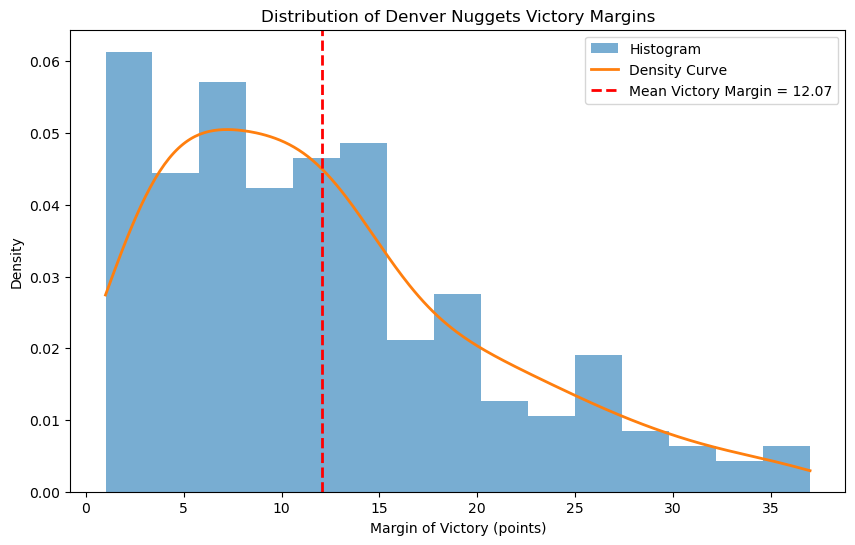

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Convert to numpy array
data = np.array(victory_margins)

# Create a KDE (smooth density curve)
kde = gaussian_kde(data)
x_vals = np.linspace(min(data), max(data), 300)
density = kde(x_vals)

plt.figure(figsize=(10, 6))

# Histogram
plt.hist(data, bins=15, density=True, alpha=0.6, label="Histogram")

# Density curve
plt.plot(x_vals, density, linewidth=2, label="Density Curve")

import statistics
mean = statistics.mean(victory_margins)
plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f"Mean Victory Margin = {mean:.2f}")

plt.title("Distribution of Denver Nuggets Victory Margins")
plt.xlabel("Margin of Victory (points)")
plt.ylabel("Density")
plt.legend()

plt.show()


In [7]:
import numpy as np
from scipy import stats

# Replace this with your actual list from your scraping script 

# Hypothesized mean margin
mu0 = 10  

# Compute t-test
t_statistic, p_value = stats.ttest_1samp(victory_margins, mu0)

# If your test is one-sided (mean > 10), divide the p-value by 2
p_value_one_sided = p_value / 2

print("Sample mean:", np.mean(victory_margins))
print("Sample size:", len(victory_margins))
print("t-statistic:", t_statistic)
print("One-sided p-value (mean > 10):", p_value_one_sided)


Sample mean: 12.071065989847716
Sample size: 197
t-statistic: 3.5133975462063955
One-sided p-value (mean > 10): 0.0002746340292054165


In [14]:
import statistics
import math

#Used one-tailed bc it is only for greater than
critValue = 1.282
mean = statistics.mean(victory_margins)
sd = statistics.stdev(victory_margins)
print("Mean: ", mean)
print("Standard Deviation: ", sd)
n = len(victory_margins)
SE = sd/math.sqrt(n)
print("Standard Error: ", SE)
ME = critValue * SE
print("Margin of Error: ", ME)
CIupper = mean + ME
CIlower = mean - ME
print("90% Confidence interval:")
print("Upper - ", CIupper)
print("Lower - ", CIlower)

Mean:  12.071065989847716
Standard Deviation:  8.273699748681807
Standard Error:  0.5894766995792882
Margin of Error:  0.7557091288606474
90% Confidence interval:
Upper -  12.826775118708364
Lower -  11.315356860987068


# ✅ My Answer

Write your conclusion in complete sentences. Interpret specific values that you find and tell me what I should believe as a reader of your study. Assume I know nothing! Finally, include any limitations that you encountered while performing your analysis that may impact your results.

In conclusion, the average (mean) margin of victory in a Denver Nuggets game is 12.07, and the standard deviation is 8.2736, which shows that the variation in scores is high. When calculating a 90% confidence interval, the Standard Error was .5894, and the Margin of Error was .7557. The upper and lower bounds of the 90% confidence interval are (11.3153, 12.8267). Because the entire confidence interval is above 10, we can reject the null hypothesis in favor of the alternative.

When plotting this data on a histogram with a density curve, it appears to be skewed right.

Some limitations of this study include the method of gathering data. It was collected using all of the Nuggets' victories from the past three seasons, so it isn't exactly random.